<a href="https://colab.research.google.com/github/Sriyansh-36-AI-NITJ/Machine-Learning-Lab/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset directly from the author's GitHub
url = "https://raw.githubusercontent.com/andymcdgeo/Andys_YouTube_Notebooks/main/Xeek%20Data/xeek_train_subset.csv"
df = pd.read_csv(url)

print(df.head())

      WELL  DEPTH_MD         X_LOC      Y_LOC       Z_LOC         GROUP  \
0  15/9-13   494.528  437641.96875  6470972.5 -469.501831  NORDLAND GP.   
1  15/9-13   494.680  437641.96875  6470972.5 -469.653809  NORDLAND GP.   
2  15/9-13   494.832  437641.96875  6470972.5 -469.805786  NORDLAND GP.   
3  15/9-13   494.984  437641.96875  6470972.5 -469.957794  NORDLAND GP.   
4  15/9-13   495.136  437641.96875  6470972.5 -470.109772  NORDLAND GP.   

  FORMATION       CALI  RSHA      RMED  ...        ROP  DTS  DCAL      DRHO  \
0       NaN  19.480835   NaN  1.611410  ...  34.636410  NaN   NaN -0.574928   
1       NaN  19.468800   NaN  1.618070  ...  34.636410  NaN   NaN -0.570188   
2       NaN  19.468800   NaN  1.626459  ...  34.779556  NaN   NaN -0.574245   
3       NaN  19.459282   NaN  1.621594  ...  39.965164  NaN   NaN -0.586315   
4       NaN  19.453100   NaN  1.602679  ...  57.483765  NaN   NaN -0.597914   

   MUDWEIGHT  RMIC  ROPA  RXO  FORCE_2020_LITHOFACIES_LITHOLOGY  \
0      

In [3]:
# Drop rows with missing values
df.dropna(inplace=True)

# Verify that no NaNs remain
print(df.describe())

       DEPTH_MD  X_LOC  Y_LOC  Z_LOC  CALI  RSHA  RMED  RDEP  RHOB   GR  ...  \
count       0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...   
mean        NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
std         NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
min         NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
25%         NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
50%         NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
75%         NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
max         NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   

       ROP  DTS  DCAL  DRHO  MUDWEIGHT  RMIC  ROPA  RXO  \
count  0.0  0.0   0.0   0.0        0.0   0.0   0.0  0.0   
mean   NaN  NaN   NaN   NaN        NaN   NaN   NaN  NaN   
std    NaN  NaN   NaN   NaN        NaN   NaN   NaN  NaN   
min    NaN  NaN   NaN   NaN        NaN   Na

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# STEP 1: RELOAD DATA (To ensure a clean start)
url = "https://raw.githubusercontent.com/andymcdgeo/Andys_YouTube_Notebooks/main/Xeek%20Data/xeek_train_subset.csv"
df = pd.read_csv(url)

# Define features
features = ['NPHI', 'RHOB']

# --- STEP 2: DIAGNOSTIC PRINTS (Before Cleaning) ---
print(f"Original shape: {df.shape}")
print(f"Columns in dataset: {list(df.columns)}")

# Check if columns actually exist
missing_cols = [col for col in features if col not in df.columns]
if missing_cols:
    raise ValueError(f"CRITICAL ERROR: The columns {missing_cols} are not in the CSV. Check spelling!")

#STEP 3: STRICT CLEANING
# Coerce to numeric (turns non-numbers to NaN)
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop NaNs specifically in our features
df.dropna(subset=features, inplace=True)

# Filter out Infinite values
df = df[~df[features].isin([np.inf, -np.inf]).any(axis=1)]

# STEP 4: DIAGNOSTIC PRINTS (After Cleaning)
print(f"Shape after cleaning: {df.shape}")

if len(df) == 0:
    raise ValueError("CRITICAL ERROR: The DataFrame is EMPTY after cleaning. Adjust your filters.")

# STEP 5:SCALE
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Assign back safely
df['NPHI_T'] = scaled_data[:, 0]
df['RHOB_T'] = scaled_data[:, 1]

print("SUCCESS: Data scaled and ready for clustering.")
print(df[['NPHI_T', 'RHOB_T']].head())

Original shape: (133198, 29)
Columns in dataset: ['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE']
Shape after cleaning: (90125, 29)
SUCCESS: Data scaled and ready for clustering.
        NPHI_T    RHOB_T
4238  2.883696 -1.996990
4239  3.124376 -1.882088
4240  2.884325 -1.809249
4241  2.440431 -1.758522
4242  2.000894 -1.825997


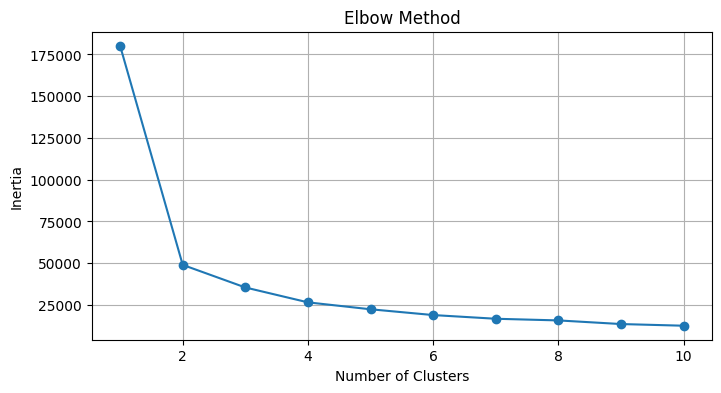

In [8]:
# Calculate inertia for a range of cluster numbers
inertias = []
max_k = 10

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['NPHI_T', 'RHOB_T']])
    inertias.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, max_k + 1), inertias, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df[['NPHI_T', 'RHOB_T']])
df['KMeans_3'] = kmeans.labels_
print(df[['NPHI', 'RHOB', 'KMeans_3']].head())

          NPHI      RHOB  KMeans_3
4238  0.765867  1.774626         0
4239  0.800262  1.800986         0
4240  0.765957  1.817696         0
4241  0.702521  1.829333         0
4242  0.639708  1.813854         0


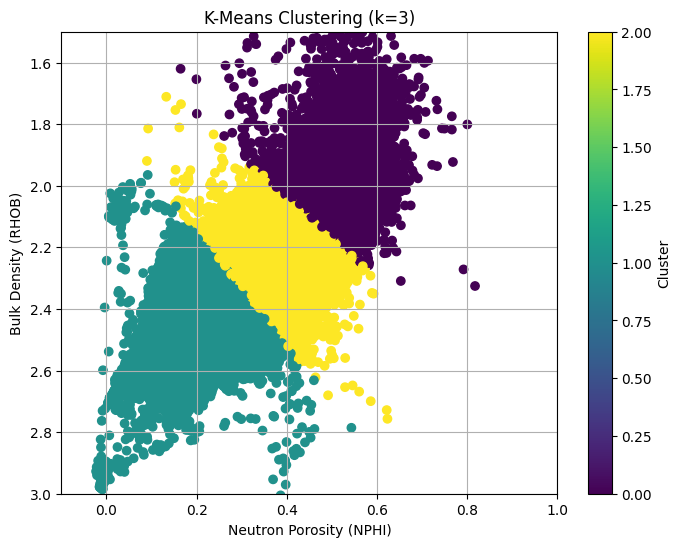

In [10]:
plt.figure(figsize=(8, 6))

# Scatter plot: NPHI vs RHOB, colored by Cluster ID
plt.scatter(df['NPHI'], df['RHOB'], c=df['KMeans_3'], cmap='viridis')

# Set typical limits for well log plots
plt.xlim(-0.1, 1)
plt.ylim(3, 1.5) # Inverted Y-axis is standard for Density logs

plt.xlabel('Neutron Porosity (NPHI)')
plt.ylabel('Bulk Density (RHOB)')
plt.title('K-Means Clustering (k=3)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

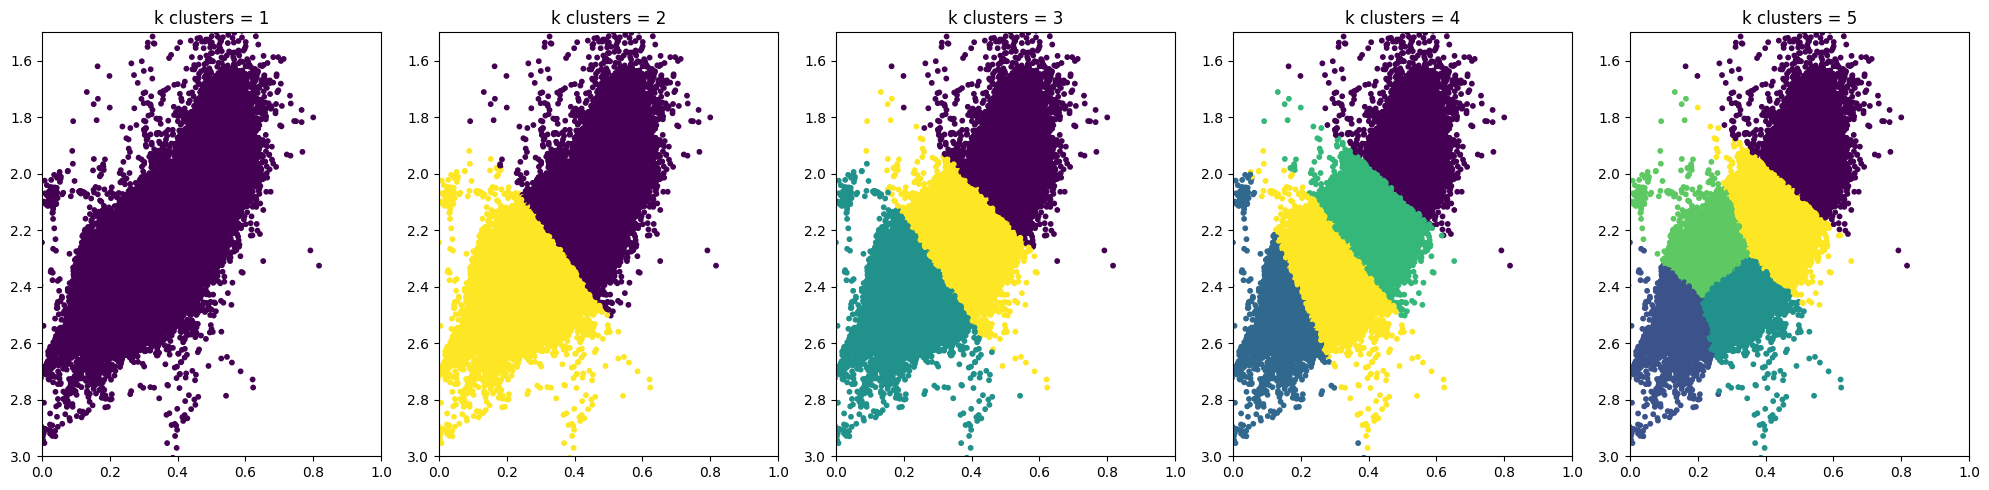

In [11]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

for i, ax in enumerate(axs, start=1):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df[['NPHI_T', 'RHOB_T']])
    labels = km.labels_

    ax.scatter(df['NPHI'], df['RHOB'], c=labels, cmap='viridis', s=10)
    ax.set_ylim(3, 1.5)
    ax.set_xlim(0, 1)
    ax.set_title(f'k clusters = {i}')

plt.tight_layout()
plt.show()